<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

<ipython-input-14-37b5183d20d6>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IG) # visualize image using imshow function
<ipython-input-14-37b5183d20d6>:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


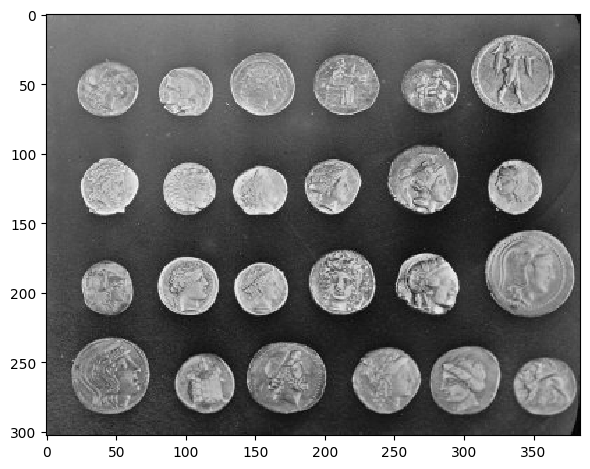

Image size:  (303, 384)
Pixel grayscale value range:  (np.uint8(1), np.uint8(252))


In [14]:
import skimage as sk # load skimage libraries
IG = sk.data.coins() # load a color image from the skimage built-in dataset
# change colormap to visualize image

sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

# shape and range in pixels
image_size = IG.shape
pixel_range = (IG.min(), IG.max())
print("Image size: ", image_size)
print("Pixel grayscale value range: ", pixel_range)

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

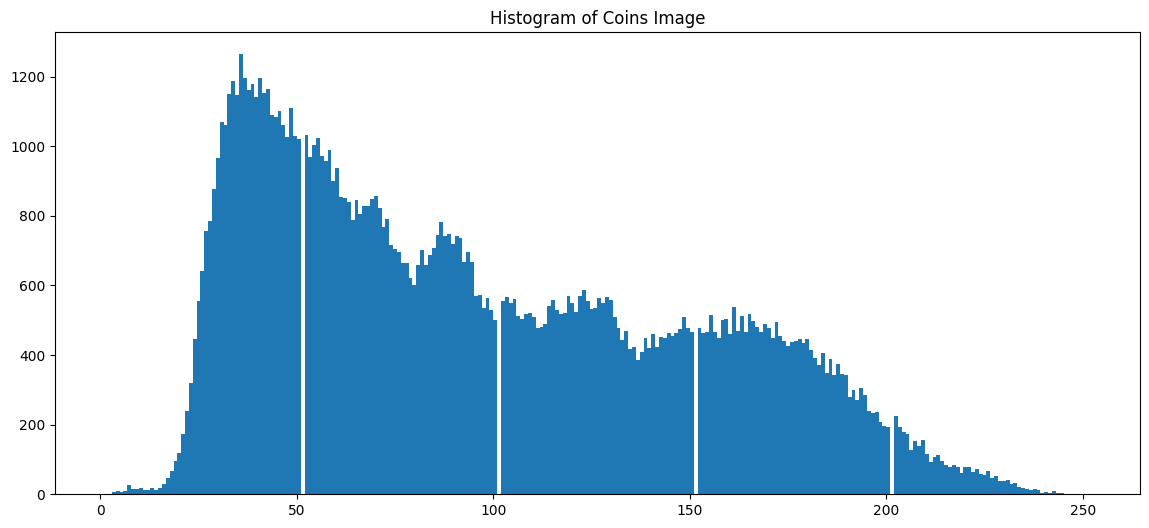

In [15]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

import matplotlib.pyplot as plt
import numpy as np

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.title('Histogram of Coins Image')
plt.show()

The highest peak of the histogram is around the area of 50, meaning that in the image we have more "dark" areas due to the dark background and shadow of the coins. We also have several peaks in between 50 to 200, meaning that we have some dark-light combination there to show that the image has some texture.

## 3. Applied noise to the image and use the correct function to erase the noise.

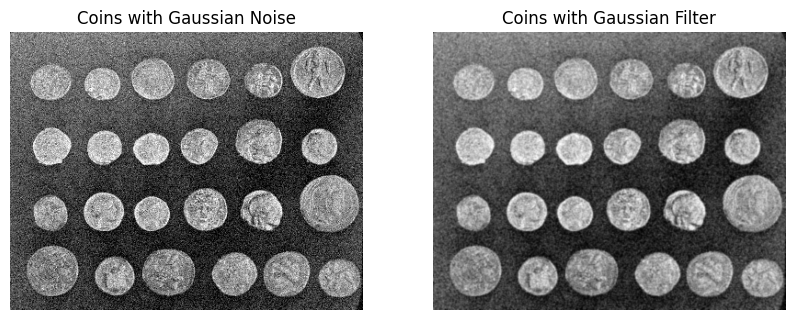

In [27]:
from skimage.filters import gaussian


# Apply Gaussian Noise
gaus1 = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True, var=0.01)

# Erasing the noise by applying Gaussian filter
fil1 = gaussian(gaus1, sigma=0.7)

# plotting
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))
for ax in axs.flat:
    ax.axis("off")
axs[0].set_title('Coins with Gaussian Noise')
axs[0].imshow(gaus1,cmap=plt.cm.gray)
axs[1].set_title('Coins with Gaussian Filter')
axs[1].imshow(fil1, cmap=plt.cm.gray)

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

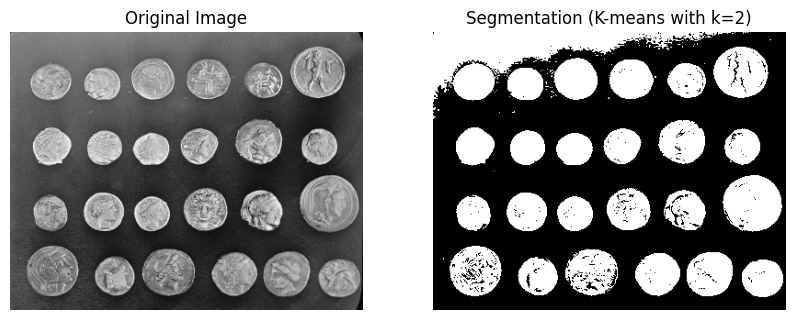

In [28]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

v_IG = IG.reshape(-1, 1)

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_IG)

v_kmeans = kmeans.predict(v_IG)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
IG_kmeans = np.reshape(v_kmeans,(IG.shape[0],IG.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(IG_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

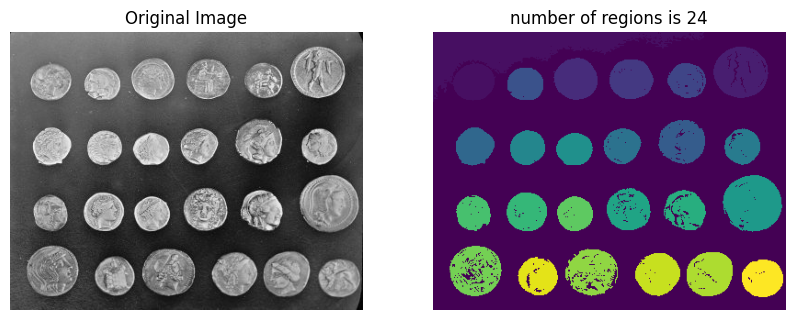

In [50]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage import morphology

thresh = threshold_otsu(IG)
bw = IG > thresh

cleaned = morphology.remove_small_objects(bw, min_size=100)

label_image, nregions = label(cleaned,return_num=True)

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(label_image)
ax2.set_title('number of regions is {}'.format(nregions))
ax2.set_axis_off()

plt.show()


## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

<Axes: xlabel='area', ylabel='major_axis_length'>

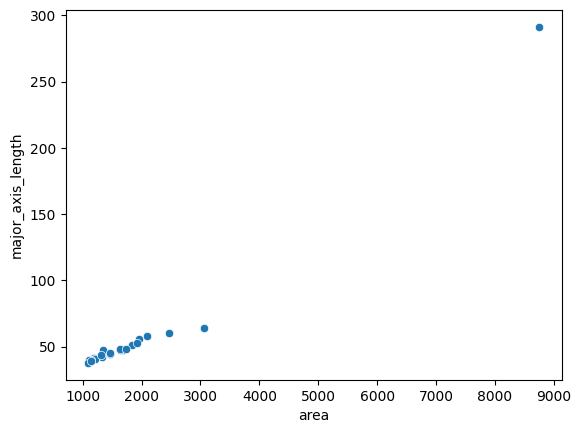

In [54]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image, properties=['label', 'area', 'major_axis_length', 'orientation'])
df_features = pd.DataFrame(props)
df_features.head()

df_features[['area', 'major_axis_length', 'orientation']].mean()

import seaborn as sns
sns.scatterplot(x='area', y='major_axis_length', data=df_features)

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [55]:
df_coins = df_features.loc[(df_features['area']>1750)]

df_coins.head()
print('number of idenfitied coins is {}'.format(df_coins.shape[0]))

number of idenfitied coins is 7


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

(np.float64(-0.5), np.float64(383.5), np.float64(302.5), np.float64(-0.5))

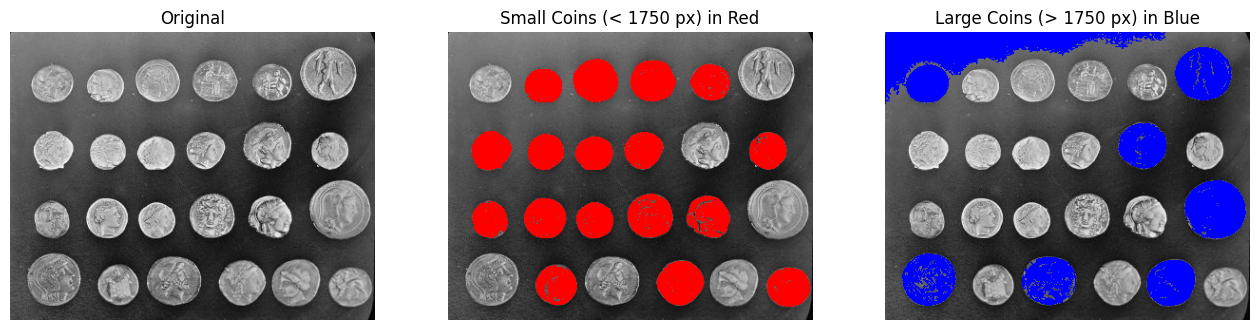

In [58]:
from skimage import color

small = df_features.loc[df_features['area'] < 1750, 'label'].values
big = df_features.loc[df_features['area'] > 1750, 'label'].values

small_mask = np.isin(label_image, small)
big_mask = np.isin(label_image, big)

overlay_small = color.gray2rgb(IG.copy())
overlay_big = color.gray2rgb(IG.copy())

overlay_small[small_mask] = [255, 0, 0]
overlay_big[big_mask] = [0, 0, 255]

fig, axs = plt.subplots(1, 3, figsize=(16, 6))

axs[0].imshow(IG, cmap='gray')
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(overlay_small)
axs[1].set_title("Small Coins (< 1750 px) in Red")
axs[1].axis("off")

axs[2].imshow(overlay_big)
axs[2].set_title("Large Coins (> 1750 px) in Blue")
axs[2].axis("off")

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

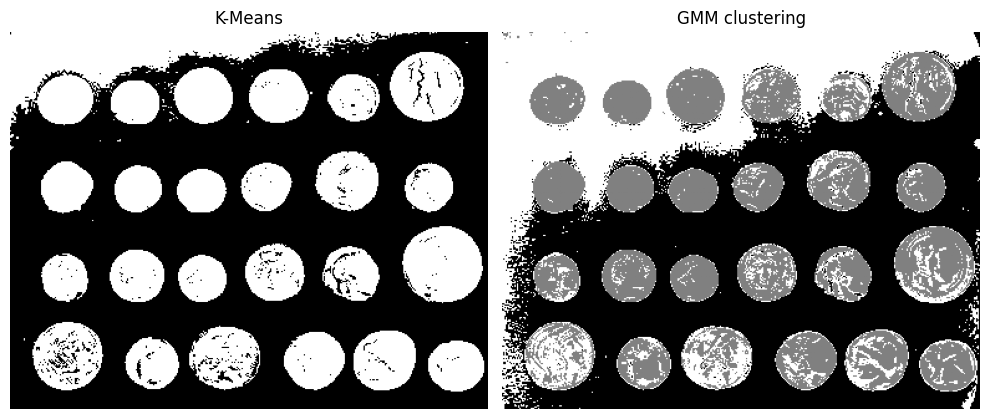

In [59]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_IG) # Fit a GMM model
v_gmm = gmm.fit_predict(v_IG) # Predict GMM cluster labels for each pixel
IG_gmm = np.reshape(v_gmm,(IG.shape[0],IG.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(IG_kmeans, cmap=plt.cm.gray)
ax0.set_title('K-Means')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(IG_gmm, cmap=plt.cm.gray)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

The main steps to do segmentation of RGB image in unsupervised clustering:
1. Load the image and process it by applying filter to reduce noises or adjust the gamma level of the image to increase the contrast
2. Convert the image into 2D array
3. Apply the unsupervised clustering method like k-means, gmm clustering, etc.
4. Reshape the label back to original image size
5. Visualized the results


with k-means we got more clean edge of the coins that's why it's better to use for counting or shape detection, however with gmm we can see that the texture can be seen better that's why gmm is better to use for clustering where the texture or the contrast is important.

## 10. Extract the main texture features of this image

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

# Suponiendo que tienes:
# - `IG`: imagen en escala de grises normalizada (float o uint8)
# - `label_image`: imagen segmentada (mismo tamaño que IG)

props = regionprops(label_image, intensity_image=IG)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IG[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

columns = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
df_texture = pd.DataFrame(props_texture, columns=columns)
print(df_texture.head())
print("\nAverage values per feature:")
print(df_texture.mean())

      contrast  dissimilarity  homogeneity    energy  correlation
0   247.638113       7.512531     0.311544  0.033891     0.892879
1   995.526634      21.321429     0.086937  0.017297     0.765693
2   539.774746      14.253932     0.115871  0.023480     0.806299
3   577.133102      16.666007     0.083029  0.020208     0.784722
4  1028.797176      21.617458     0.076587  0.021379     0.736437

Average values per feature:
contrast         749.855160
dissimilarity     17.232009
homogeneity        0.098820
energy             0.021947
correlation        0.842467
dtype: float64


## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)